In [20]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [21]:
car2 = 56767 + 31303
bus2 = 17962
taxi2 = 27244
heavy2 = 3454
medium2 = 19500

car3 = 59156 + 31442
bus3 = 16195
taxi3 = 24785
heavy3 = 6411
medium3 = 16320

car = car2 + car3
bus = bus2 + bus3
taxi = taxi2 + taxi3
heavy = heavy2 + heavy3
medium = medium2 + medium3

In [22]:
car, bus, taxi, heavy, medium, car+bus+taxi+heavy+medium

(178668, 34157, 52029, 9865, 35820, 310539)

In [23]:
with open("./emission_greenwave.pickle", "rb") as file:
    emissions_greenwave = pickle.load(file)
emissions_gw = pd.DataFrame(emissions_greenwave)
emissions_gw.mean(), emissions_gw.mean().sum()

(car       185481.122844
 bus        30458.011808
 taxi       14040.712056
 heavy      11754.445438
 medium     13478.773914
 dtype: float64,
 255213.06606004998)

In [24]:
emissions_gw['car'].values

array([191198.5458705, 179357.0129505, 191040.9589305, 180201.2287005,
       182321.335854 , 183223.5210855, 184409.9256195, 190271.596977 ,
       179601.2727075, 193185.829746 ])

In [25]:
with open("./emission_baseline.pickle", "rb") as file:
    emissions = pickle.load(file)
emissions = pd.DataFrame(emissions)
emissions.mean(), emissions.mean().sum()

(car       219442.346597
 bus        37074.975958
 taxi       17944.554894
 heavy      14884.278105
 medium     17198.830707
 dtype: float64,
 306544.9862611499)

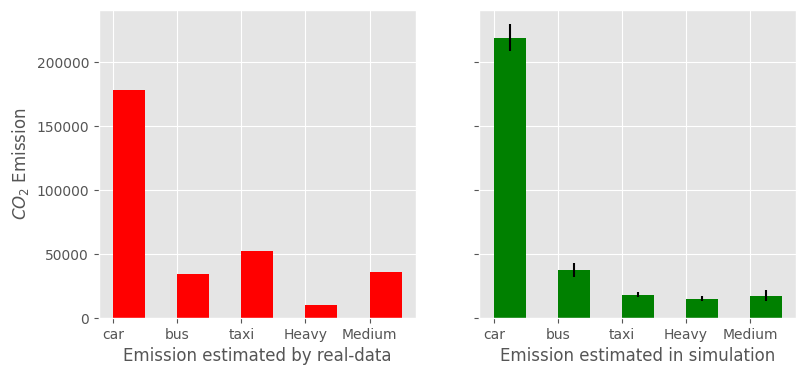

In [26]:
# sns.barplot(data=emissions, y='car', orient='v')
fig, axs = plt.subplots(1,2, sharex=False, sharey=True)
fig.set_size_inches(9, 4)
ax = axs.flat[0]
ax.bar(x=['car', 'bus', 'taxi', 'Heavy', 'Medium'], 
       height=[car, bus, taxi, heavy, medium], 
       color='red',
       width=0.5,
       align='edge', 
)
ax.set_xlabel('Emission estimated by real-data')
ax.set_ylabel(r'$CO_2$ Emission')
ax = axs.flat[1]
plt.bar(x=['car', 'bus', 'taxi', 'Heavy', 'Medium'], 
        height=emissions.mean(), 
        color='green',        
        width=0.5,
        align='edge',   
        yerr=emissions.std(),
        ecolor='black')
ax.set_xlabel('Emission estimated in simulation')
fig.savefig("./data_validation.png", dpi=400, bbox_inches='tight')

In [27]:
emissions_gw.mean().sum(), emissions.mean().sum(), car+bus+taxi+heavy+medium

(255213.06606004998, 306544.9862611499, 310539)

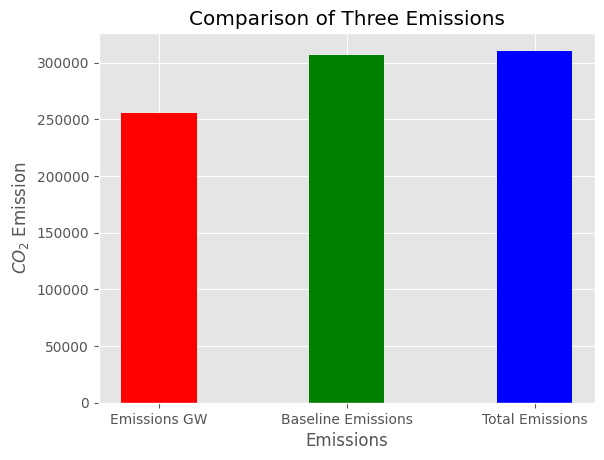

In [33]:
import matplotlib.pyplot as plt

# 数据
categories = ['Emissions GW', 'Baseline Emissions', 'Total Emissions']
data = [emissions_gw.mean().sum(), emissions.mean().sum(), car+bus+taxi+heavy+medium]

# 颜色列表
colors = ['red', 'green', 'blue']

# 绘图
plt.bar(categories, data, width=0.4, color=colors)  # 设置颜色列表
plt.xlabel('Emissions')
plt.ylabel(r'$CO_2$ Emission')
plt.title('Comparison of Three Emissions')

# 显示图形
plt.show()

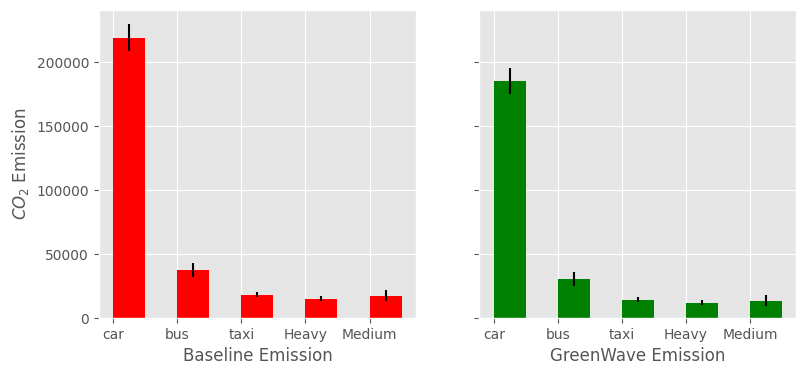

In [29]:
# sns.barplot(data=emissions, y='car', orient='v')
fig, axs = plt.subplots(1,2, sharex=False, sharey=True)
fig.set_size_inches(9, 4)
ax = axs.flat[0]
ax.bar(x=['car', 'bus', 'taxi', 'Heavy', 'Medium'], 
        height=emissions.mean(), 
        color='red',        
        width=0.5,
        align='edge',   
        yerr=emissions.std(),
        ecolor='black'
)
ax.set_xlabel('Baseline Emission')
ax.set_ylabel(r'$CO_2$ Emission')
ax = axs.flat[1]
plt.bar(x=['car', 'bus', 'taxi', 'Heavy', 'Medium'], 
        height=emissions_gw.mean(), 
        color='green',        
        width=0.5,
        align='edge',   
        yerr=emissions.std(),
        ecolor='black')
ax.set_xlabel('GreenWave Emission')
fig.savefig("./comparison_mode.png", dpi=400, bbox_inches='tight')

In [30]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

car_gw = emissions_gw['car'].values
car_bl = emissions['car'].values

bus_gw = emissions_gw['bus'].values
bus_bl = emissions['bus'].values

taxi_gw = emissions_gw['taxi'].values
taxi_bl = emissions['taxi'].values

heavy_gw = emissions_gw['heavy'].values
heavy_bl = emissions['heavy'].values

medium_gw = emissions_gw['medium'].values
medium_bl = emissions['medium'].values

gw = emissions_gw.sum(axis=1).values
bl = emissions.sum(axis=1).values

t_statistic, p_value = stats.ttest_ind(gw, bl, equal_var=False)
t_statistic_car, p_value_car = stats.ttest_ind(car_gw, car_bl, equal_var=False)
t_statistic_taxi, p_value_taxi = stats.ttest_ind(taxi_gw, taxi_bl, equal_var=False)
t_statistic_bus, p_value_bus = stats.ttest_ind(bus_gw, bus_bl, equal_var=False)
t_statistic_heavy, p_value_heavy = stats.ttest_ind(heavy_gw, heavy_bl, equal_var=False)
t_statistic_medium, p_value_medium = stats.ttest_ind(medium_gw, medium_bl, equal_var=False)


# 打印t-test结果
print('T-Statistic (GreenWave vs Baseline):', t_statistic)
print('P-Value (Greenwave vs Baseline):', p_value)
print('T-Statistic-Car (GreenWave vs Baseline):', t_statistic_car)
print('P-Value-Car (Greenwave vs Baseline):', p_value_car)
print('T-Statistic-Bus (GreenWave vs Baseline):', t_statistic_bus)
print('P-Value-Bus (Greenwave vs Baseline):', p_value_bus)
print('T-Statistic-Taxi (Greenwave vs Baseline):', t_statistic_taxi)
print('P-Value-Taxi (Greenwave vs Baseline):', p_value_taxi)
print('T-Statistic-Heavy (Greenwave vs Baseline):', t_statistic_heavy)
print('P-Value-Heavy (Greenwave vs Baseline):', p_value_heavy)
print('T-Statistic-Medium (Greenwave vs Baseline):', t_statistic_medium)
print('P-Value-Medium (Greenwave vs Baseline):', p_value_medium)


T-Statistic (GreenWave vs Baseline): -8.894478010867534
P-Value (Greenwave vs Baseline): 1.0196358007156856e-07
T-Statistic-Car (GreenWave vs Baseline): -9.18918389715079
P-Value-Car (Greenwave vs Baseline): 3.4357508562890457e-07
T-Statistic-Bus (GreenWave vs Baseline): -2.6153540264081836
P-Value-Bus (Greenwave vs Baseline): 0.0175377910063328
T-Statistic-Taxi (Greenwave vs Baseline): -5.046701548271877
P-Value-Taxi (Greenwave vs Baseline): 0.00013147164655037764
T-Statistic-Heavy (Greenwave vs Baseline): -3.411529452905794
P-Value-Heavy (Greenwave vs Baseline): 0.0031560330959523827
T-Statistic-Medium (Greenwave vs Baseline): -2.1886891560018777
P-Value-Medium (Greenwave vs Baseline): 0.043292594105625685


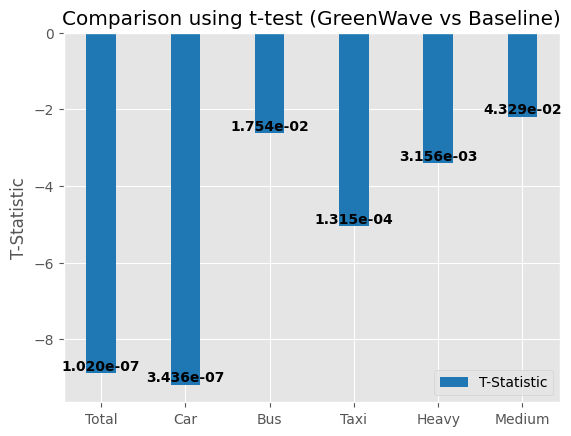

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 数据和t-test结果
data = ['Total', 'Car', 'Bus', 'Taxi', 'Heavy', 'Medium']
t_statistic = [-8.894478010867534, -9.18918389715079, -2.6153540264081836, -5.046701548271877, -3.411529452905794, -2.1886891560018777]
p_value = [1.0196358007156856e-07, 3.4357508562890457e-07, 0.0175377910063328, 0.00013147164655037764, 0.0031560330959523827, 0.043292594105625685]

# 绘制柱状图
x = np.arange(len(data))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x, t_statistic, width, label='T-Statistic', color='#1f77b4')
ax.set_ylabel('T-Statistic')
ax.set_title('Comparison using t-test (GreenWave vs Baseline)')
ax.set_xticks(x)
ax.set_xticklabels(data)
ax.legend()

# 添加p-value标签
for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{p_value[i]:.3e}',
            ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

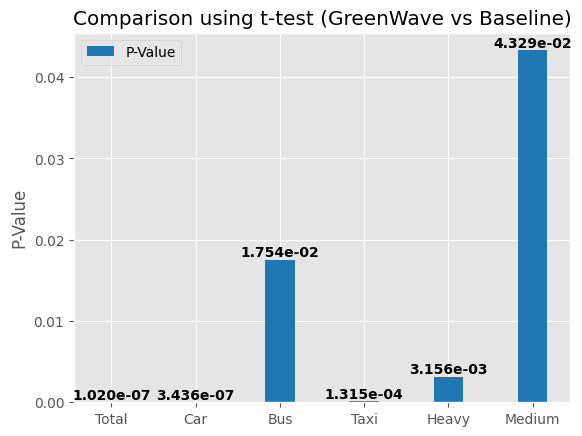

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 数据和t-test结果
data = ['Total', 'Car', 'Bus', 'Taxi', 'Heavy', 'Medium']
t_statistic = [-8.894478010867534, -9.18918389715079, -2.6153540264081836, -5.046701548271877, -3.411529452905794, -2.1886891560018777]
p_value = [1.0196358007156856e-07, 3.4357508562890457e-07, 0.0175377910063328, 0.00013147164655037764, 0.0031560330959523827, 0.043292594105625685]

# 绘制柱状图
x = np.arange(len(data))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x, p_value, width, label='P-Value', color='#1f77b4')
ax.set_ylabel('P-Value')
ax.set_title('Comparison using t-test (GreenWave vs Baseline)')
ax.set_xticks(x)
ax.set_xticklabels(data)
ax.legend()

# 添加p-value标签
for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{p_value[i]:.3e}',
            ha='center', va='bottom', color='black', fontweight='bold')

plt.show()